R0: 1.512
[[1.00000000e+00 0.00000000e+00]
 [1.00042576e+00 9.99499040e-07]
 [1.00085170e+00 1.99799676e-06]
 ...
 [9.06317579e+02 4.88781664e-01]
 [9.06703450e+02 4.88989766e-01]
 [9.07089486e+02 4.89197957e-01]]


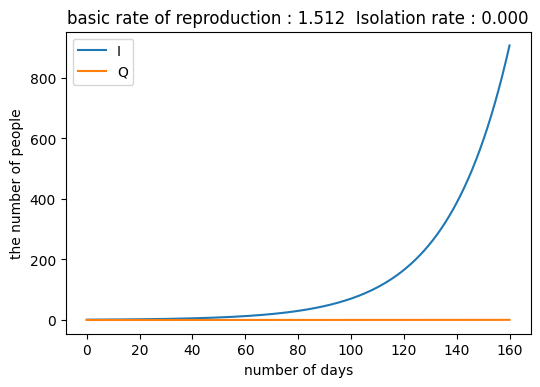

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
#import sys

def IQ(v, t, beta, gamma, gamma_dash, p, N):
    rvalue = [0,0]
    if rvalue[0] != 0:
        p = 230/rvalue[1]
    #beta_ss_ii = beta * v[0] * v[1]
    rvalue[0] = beta * N * v[0] - p * v[0] - gamma * v[0]
    rvalue[1] = p * v[0] - gamma_dash * v[1]
    return rvalue


def calc_proc(times, beta_const, gamma_const, gamma_dash_const, p):
    N = 100000
    I_0 = 1
    Q_0 = 0
    ini_state = [I_0,Q_0]
    args  =(beta_const, gamma_const, gamma_dash_const, p, N)
    R0 = N * beta_const * (1/gamma_const)
    print("R0:", R0)
    result = odeint(IQ, ini_state, times, args)
    return R0,result


def plot(R0, p, times, result):
    str_out = "basic rate of reproduction : {}".format(format(R0, ".3f"))
    str_out += "  "
    str_out += "Isolation rate : {}".format(format(p, ".3f"))
    plt.figure(dpi=100)
    plt.title(str_out)
    plt.xlabel('number of days')
    plt.ylabel('the number of people')
    plt.plot(times, result)
    plt.legend(['I','Q'])
    plt.show()


if __name__ == "__main__":
    #sys.stderr.write("*** start ***\n")
    t_max = 160
    dt = 0.01
    beta_const = 0.126/100000
    gamma_const = 1/12
    gamma_dash_const = 1/7
    
    p = 0.0001
    
    #sys.stderr.write("p_kakuri = %.3f\n" % p)
    times =np.arange(0,t_max, dt)
    R0,result = calc_proc(times, beta_const, gamma_const, gamma_dash_const, p)
    print(result)
    plot(R0,p,times,result)
#
    #sys.stderr.write("*** end ***\n")




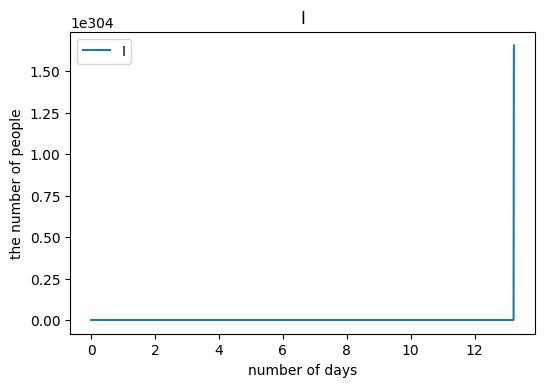

In [15]:
#I096 = [result096[i][1] for i in range(16000)]
#I296 = [result296[i][1] for i in range(16000)]
#I496 = [result496[i][1] for i in range(16000)]
I = [result[i][1] for i in range(160000)]

plt.figure(dpi=100)
#plt.plot(times, I096, label="I096")
#plt.plot(times, I296,label="I296")
#plt.plot(times, I496,label="I496")
plt.plot(times, I,label="I")
plt.xlabel('number of days')
plt.ylabel('the number of people')
plt.title("I")
plt.legend()
plt.show()

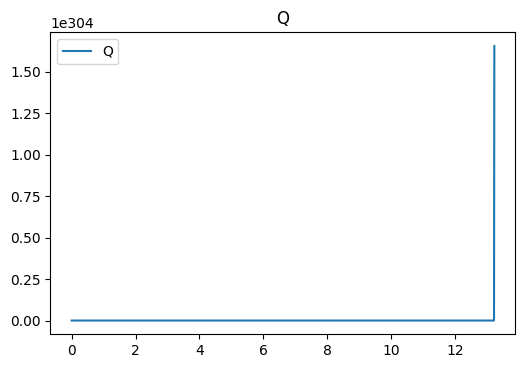

In [16]:
#I096 = [result096[i][0] for i in range(16000)]
#I296 = [result296[i][0] for i in range(16000)]
#I496 = [result496[i][0] for i in range(16000)]
Q = [result[i][2] for i in range(160000)]
plt.figure(dpi=100)
#plt.plot(times, I096, label="I096")
#plt.plot(times, I296,label="I296")
#plt.plot(times, I496,label="I496")
plt.plot(times, I,label="Q")
plt.title("Q")
plt.legend()
plt.savefig("IQ.png")
plt.show()


In [ ]:
    """
    Define the SIQR model.
    
    Parameters
    ----------------
    v: list
        v = [N, I, Q]
        N: 人口
        I: 市中感染者
        Q: 隔離者
    t: float
        represent time. need for scipy.odeint.
    beta: float
        感染割合
    gamma: float
        回復割合
    p: float
        隔離率
    
    Returns
    -----------
    rvalue: list
        rvalue = [N, I', Q']
    """
    
        """
    数値計算 using odeint.
    
    Parameter
    --------------
    
    
    Returns
    -----------
    R0: float
        基本再生産数. 感染した1人の感染者が, 
        誰も免疫を持たない集団に加わったとき
        平均して何人に直接感染させる人数.
    
    result: float
        数値計算の結果.
        
    """

In [31]:
1/33

0.030303030303030304